# __Exploration__

We are using TSLA stock from `10-Jan-2018` to `10-Jan-2020`, same stock can be found [here](https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1515542400&period2=1578614400&interval=1d&events=history).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the stock

In [2]:
df = pd.read_csv('./stocks/TSLA.csv')[::-1] #we want stock to be imported from latest to old so we used [::-1] while importing 

## Looking at the different features of the stock

In [3]:
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
502,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400
501,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300
500,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100
499,2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000
498,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500


In [4]:
df.shape

(503, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,296.700120,302.308270,291.143042,297.023201,297.023201,9.034215e+06
std,50.770027,51.915962,50.063979,51.182540,51.182540,5.046309e+06
min,181.100006,186.679993,176.990005,178.970001,178.970001,2.465600e+06
25%,257.615006,262.125000,252.175003,257.835007,257.835007,5.755900e+06
50%,300.500000,305.980011,293.679993,300.079987,300.079987,7.452500e+06
75%,334.750000,341.750000,329.514999,334.860001,334.860001,1.028335e+07
max,497.100006,498.799988,472.869995,492.140015,492.140015,3.364970e+07


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df['Date'] = df['Date'].astype(np.dtype('datetime64[ns]')) #we're converting the object to datetime64[ns] of the Date Column

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
502,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400
501,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300
500,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100
499,2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000
498,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500
...,...,...,...,...,...,...,...
4,2018-01-17,340.470001,349.000000,339.750000,347.160004,347.160004,7103500
3,2018-01-16,337.540009,345.000000,334.799988,340.059998,340.059998,6474300
2,2018-01-12,338.630005,340.410004,333.670013,336.220001,336.220001,4825100
1,2018-01-11,335.239990,344.809998,333.260010,337.950012,337.950012,6645500


In [10]:
df['Date'].max() - df['Date'].min() # record is of 729 days

Timedelta('729 days 00:00:00')

## Checking the Data of last 90 days

In [11]:
last_90 = df[:90]
last_90.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
417,2019-09-09,230.000000,233.759995,229.229996,231.789993,231.789993,4802700
416,2019-09-06,227.199997,229.639999,225.169998,227.449997,227.449997,4189400
415,2019-09-05,222.500000,229.800003,220.850006,229.580002,229.580002,7395300
414,2019-09-04,226.889999,228.460007,219.210007,220.679993,220.679993,5761000
413,2019-09-03,224.080002,228.949997,223.160004,225.009995,225.009995,5354100


- Maximum Price in last 90 Days

In [12]:
last_90[last_90['Close'] == last_90['Close'].max()] 

,Date,Open,High,Low,Close,Adj Close,Volume
501,2020-01-08,473.700012,498.48999,468.230011,492.140015,492.140015,31144300


- Minimum Price in last 90 Days

In [13]:
last_90[last_90['Close'] == last_90['Close'].min()]

,Date,Open,High,Low,Close,Adj Close,Volume
414,2019-09-04,226.889999,228.460007,219.210007,220.679993,220.679993,5761000


- Average/Mean Price of last 90 Days

In [14]:
last_90['Close'].mean()

314.8481118222223

## Volume-Weighted Average Price

In [15]:
ndf = df
ndf['Month'] = ndf['Date'].dt.month
ndf['Year'] = ndf['Date'].dt.year
ndf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
502,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400,1,2020
501,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300,1,2020
500,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100,1,2020
499,2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000,1,2020
498,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500,1,2020


In [16]:
group1 = ndf.groupby(['Year','Month'])
group1.first()

Date        Open        High         Low       Close  \
Year Month                                                              
2018 1     2018-01-31  347.510010  356.190002  345.190002  354.309998   
     2     2018-02-28  352.570007  355.239990  342.220001  343.059998   
     3     2018-03-29  256.489990  270.959991  248.210007  266.130005   
     4     2018-04-30  293.609985  298.730011  292.500000  293.899994   
     5     2018-05-31  287.209991  290.369995  282.929993  284.730011   
     6     2018-06-29  353.329987  353.859985  342.410004  342.950012   
     7     2018-07-31  292.250000  298.320007  289.070007  298.140015   
     8     2018-08-31  302.000000  305.309998  298.600006  301.660004   
     9     2018-09-28  270.260010  278.000000  260.559998  264.769989   
     10    2018-10-31  332.540009  342.000000  329.100006  337.320007   
     11    2018-11-30  341.829987  351.600006  338.260010  350.480011   
     12    2018-12-31  337.790009  339.209991  325.260010  332.799988   
2019 1     2019-01-31  301.000000  311.559998  294.000000  307.019989   
     2     2019-02-28  318.920013  320.000000  310.809998  319.880005   
     3     2019-03-29  278.700012  280.160004  274.500000  279.859985   
     4     2019-04-30  242.059998  244.210007  237.000000  238.690002   
     5     2019-05-31  185.100006  189.919998  184.100006  185.160004   
     6     2019-06-28  220.990005  225.169998  220.800003  223.460007   
     7     2019-07-31  243.000000  246.679993  236.649994  241.610001   
     8     2019-08-30  229.149994  232.440002  224.210007  225.610001   
     9     2019-09-30  243.000000  243.979996  236.110001  240.869995   
     10    2019-10-31  313.100006  319.000000  313.000000  314.920013   
     11    2019-11-29  331.109985  331.260010  327.500000  329.940002   
     12    2019-12-31  405.000000  421.290009  402.079987  418.329987   
2020 1     2020-01-09  497.100006  498.799988  472.869995  481.339996   

             Adj Close    Volume  
Year Month                        
2018 1      354.309998   6214100  
     2      343.059998   6069700  
     3      266.130005  15170700  
     4      293.899994   4228200  
     5      284.730011   5919700  
     6      342.950012   6492400  
     7      298.140015   5076900  
     8      301.660004   5375100  
     9      264.769989  33649700  
     10     337.320007   7624300  
     11     350.480011   5629100  
     12     332.799988   6302300  
2019 1      307.019989  12569200  
     2      319.880005  10520700  
     3      279.859985   5991300  
     4      238.690002   9464600  
     5      185.160004  10406700  
     6      223.460007   6851400  
     7      241.610001   9178200  
     8      225.610001   9320600  
     9      240.869995   5879800  
     10     314.920013   5067000  
     11     329.940002   2465600  
     12     418.329987  10285700  
2020 1      481.339996  28440400

In [17]:
vwap = []
monthyearvwap = []
for year,group in group1:
    vwap.append(sum(group['Close'] * group['Volume'])/sum(group['Volume']))
    monthyearvwap.append(str(year[1]) + '/' + str(year[0]))

- Volume-Weighted Average Price, Month Wise

In [18]:
pd.DataFrame({
    'Month/Year' : monthyearvwap,
    'vwap' : vwap
})

,Month/Year,vwap
0,1/2018,344.811082
1,2/2018,333.127078
2,3/2018,305.360312
3,4/2018,288.254939
4,5/2018,289.493045
5,6/2018,337.851252
6,7/2018,313.085271
7,8/2018,338.431432
8,9/2018,283.920424
9,10/2018,290.773926


## Percent Change

In [19]:
df['Percent Change'] = df['Close'].pct_change()*100
df = df.fillna(0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Percent Change
502,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400,1,2020,0.000000
501,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300,1,2020,2.243740
500,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100,1,2020,-4.689726
499,2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000,1,2020,-3.735128
498,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500,1,2020,-1.889090
...,...,...,...,...,...,...,...,...,...,...
4,2018-01-17,340.470001,349.000000,339.750000,347.160004,347.160004,7103500,1,2018,0.751661
3,2018-01-16,337.540009,345.000000,334.799988,340.059998,340.059998,6474300,1,2018,-2.045168
2,2018-01-12,338.630005,340.410004,333.670013,336.220001,336.220001,4825100,1,2018,-1.129212
1,2018-01-11,335.239990,344.809998,333.260010,337.950012,337.950012,6645500,1,2018,0.514547


## Trends

In [20]:
#function to set the trends with respect to their Percent Change
def trendsetter(arr):
    arr[0] = 0;
    narr = []
    for x in arr:
        if -0.5 <= x <= 0.5:
            narr.append('Slight or No Change')
        elif 0.5 <= x <= 1:
            narr.append('Slight Positive')
        elif -1 <= x <= -0.5:
            narr.append('Slight Negative')
        elif 1 <= x <= 3:
            narr.append('Positive')
        elif -3 <= x <= -1:
            narr.append('Negative')
        elif 3 <= x <= 7:
            narr.append('Among Top Gainers')
        elif -7 <= x <= -3:
            narr.append('Among Top Losers')
        elif x > 7 :
            narr.append('Bull Run')
        elif x < -7:
            narr.append('Bear Drop')
    return np.array(narr)

In [21]:
df['Trend'] = trendsetter(df['Percent Change'].values)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Percent Change,Trend
502,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400,1,2020,0.000000,Slight or No Change
501,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300,1,2020,2.243740,Positive
500,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100,1,2020,-4.689726,Among Top Losers
499,2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000,1,2020,-3.735128,Among Top Losers
498,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500,1,2020,-1.889090,Negative
...,...,...,...,...,...,...,...,...,...,...,...
4,2018-01-17,340.470001,349.000000,339.750000,347.160004,347.160004,7103500,1,2018,0.751661,Slight Positive
3,2018-01-16,337.540009,345.000000,334.799988,340.059998,340.059998,6474300,1,2018,-2.045168,Negative
2,2018-01-12,338.630005,340.410004,333.670013,336.220001,336.220001,4825100,1,2018,-1.129212,Negative
1,2018-01-11,335.239990,344.809998,333.260010,337.950012,337.950012,6645500,1,2018,0.514547,Slight Positive


In [22]:
group2 = df.groupby('Trend')
group2.first()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Percent Change
Trend,,,,,,,,,,
Among Top Gainers,2019-12-27,435.000000,435.309998,426.109985,430.380005,430.380005,9945700,12,2019,3.781045
Among Top Losers,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100,1,2020,-4.689726
Bear Drop,2019-10-24,298.369995,304.929993,289.200012,299.679993,299.679993,29720900,10,2019,-8.670348
Bull Run,2019-09-23,240.000000,245.179993,239.220001,241.229996,241.229996,4340200,9,2019,8.073110
Negative,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500,1,2020,-1.889090
Positive,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300,1,2020,2.243740
Slight Negative,2019-12-30,428.790009,429.000000,409.260010,414.700012,414.700012,12586400,12,2019,-0.867730
Slight Positive,2019-12-16,362.549988,383.609985,362.500000,381.500000,381.500000,18174200,12,2019,0.662289
Slight or No Change,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400,1,2020,0.000000


In [23]:
avg = []
mead = []
trendstype = []
for trends, g in group2:
    trendstype.append(trends)
    avg.append(g['Volume'].mean())
    mead.append(g['Volume'].median())

In [24]:
pd.DataFrame({
    'Trend': trendstype,
    'Average': avg,
    'Median': mead,
})

,Trend,Average,Median
0,Among Top Gainers,9.655915e+06,7674000.0
1,Among Top Losers,1.043147e+07,9200500.0
2,Bear Drop,1.455413e+07,10129400.0
3,Bull Run,8.534644e+06,7973350.0
4,Negative,7.948614e+06,6941500.0
5,Positive,9.016926e+06,7327700.0
6,Slight Negative,8.694967e+06,7452500.0
7,Slight Positive,8.334345e+06,7188200.0
8,Slight or No Change,9.210054e+06,7316400.0


## Saving the stock file

In [25]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Percent Change,Trend
502,2020-01-09,497.100006,498.799988,472.869995,481.339996,481.339996,28440400,1,2020,0.000000,Slight or No Change
501,2020-01-08,473.700012,498.489990,468.230011,492.140015,492.140015,31144300,1,2020,2.243740,Positive
500,2020-01-07,461.399994,471.630005,453.359985,469.059998,469.059998,17882100,1,2020,-4.689726,Among Top Losers
499,2020-01-06,440.470001,451.559998,440.000000,451.540009,451.540009,10133000,1,2020,-3.735128,Among Top Losers
498,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500,1,2020,-1.889090,Negative
...,...,...,...,...,...,...,...,...,...,...,...
4,2018-01-17,340.470001,349.000000,339.750000,347.160004,347.160004,7103500,1,2018,0.751661,Slight Positive
3,2018-01-16,337.540009,345.000000,334.799988,340.059998,340.059998,6474300,1,2018,-2.045168,Negative
2,2018-01-12,338.630005,340.410004,333.670013,336.220001,336.220001,4825100,1,2018,-1.129212,Negative
1,2018-01-11,335.239990,344.809998,333.260010,337.950012,337.950012,6645500,1,2018,0.514547,Slight Positive


In [26]:
df.to_csv('./stocks/TSLA01.csv', index=False)

## Visualising

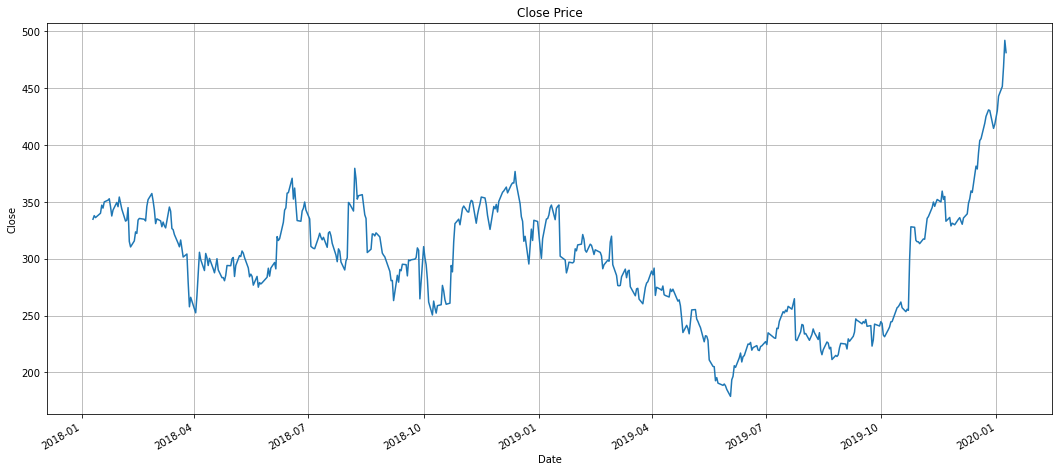

In [27]:
plt.figure(figsize=(18,8))
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Price')
plt.grid()
plt.gcf().autofmt_xdate()

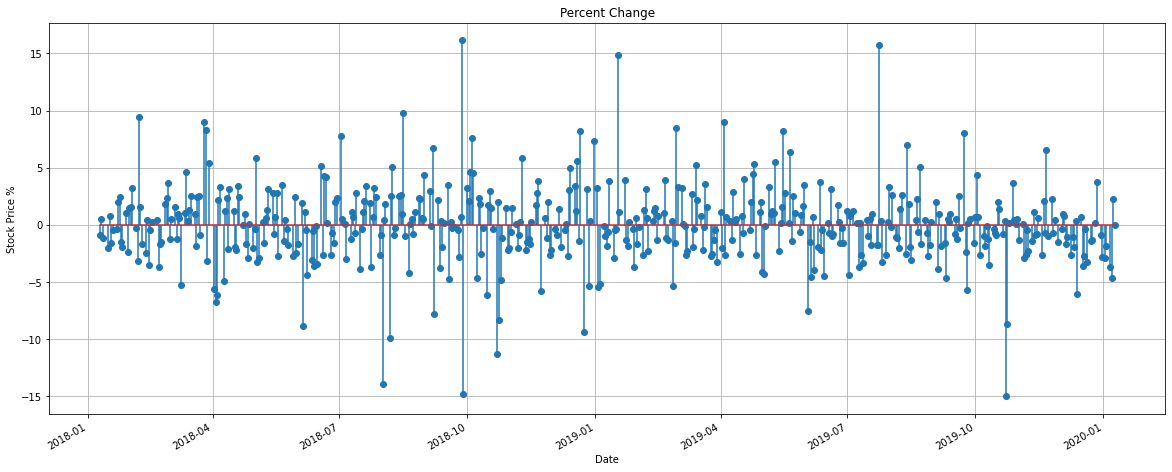

In [28]:
plt.figure(figsize=(20,8))
plt.stem(df['Date'],df['Percent Change'], use_line_collection=True)
plt.xlabel('Date')
plt.ylabel('Stock Price %')
plt.title('Percent Change')
plt.grid()
plt.gcf().autofmt_xdate()

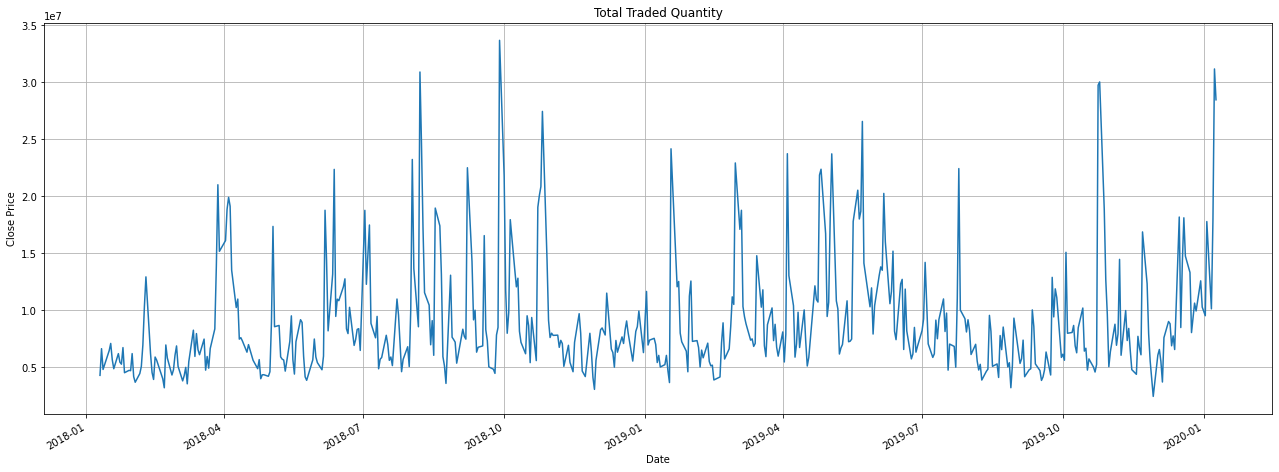

In [29]:
plt.figure(figsize=(22,8))
plt.plot(df['Date'],df['Volume'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Total Traded Quantity')
plt.grid()
plt.gcf().autofmt_xdate()

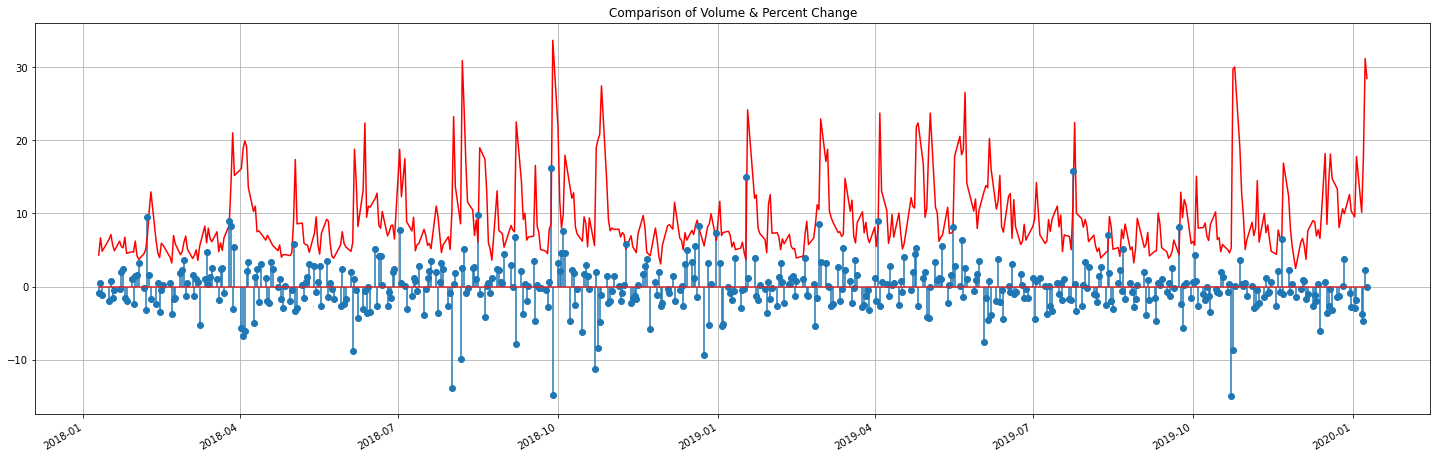

In [30]:
plt.figure(figsize=(25,8))
plt.plot(df['Date'],df['Volume']/10**6, c='r')
plt.stem(df['Date'],df['Percent Change'], use_line_collection=True)
plt.title('Comparison of Volume & Percent Change')
plt.grid()
plt.gcf().autofmt_xdate()

In [31]:
df.describe()[['Volume','Percent Change']]

,Volume,Percent Change
count,5.030000e+02,503.000000
mean,9.034215e+06,-0.014835
std,5.046309e+06,3.389267
min,2.465600e+06,-15.016017
25%,5.755900e+06,-1.814640
50%,7.452500e+06,0.000000
75%,1.028335e+07,1.592711
max,3.364970e+07,16.146090


In [32]:
df['Volume'].corr(df['Percent Change'])

-0.07219625309901381

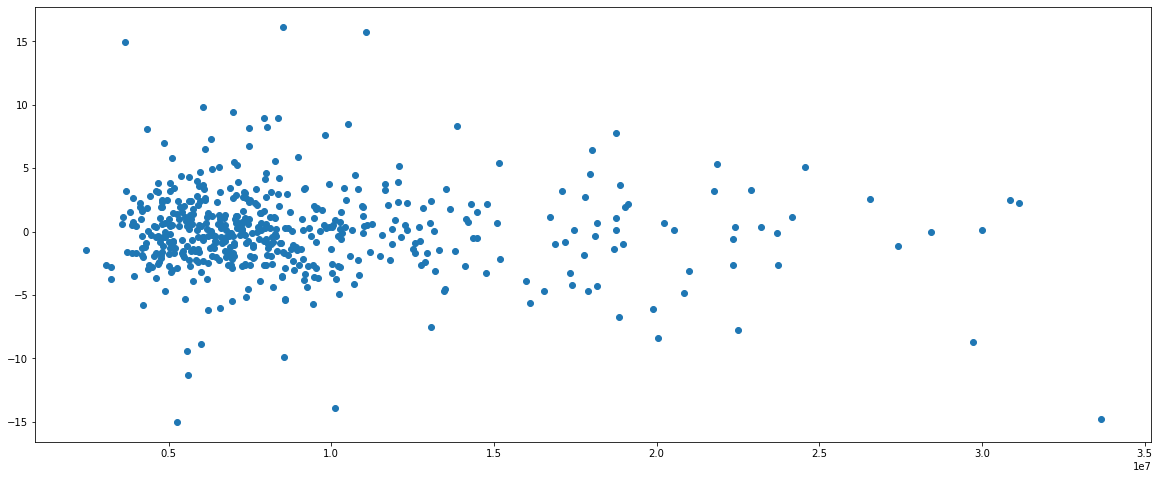

In [33]:
plt.figure(figsize=(20,8))
plt.scatter(df['Volume'],df['Percent Change'])

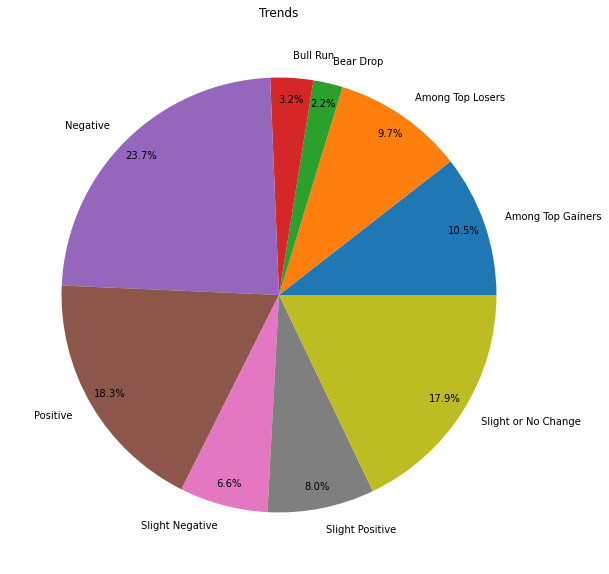

In [34]:
plt.figure(figsize=(10,10))
plt.pie(group2.size(), labels=group2.groups,autopct='%1.1f%%', pctdistance=0.9)
plt.title('Trends')
plt.show()

<BarContainer object of 9 artists>

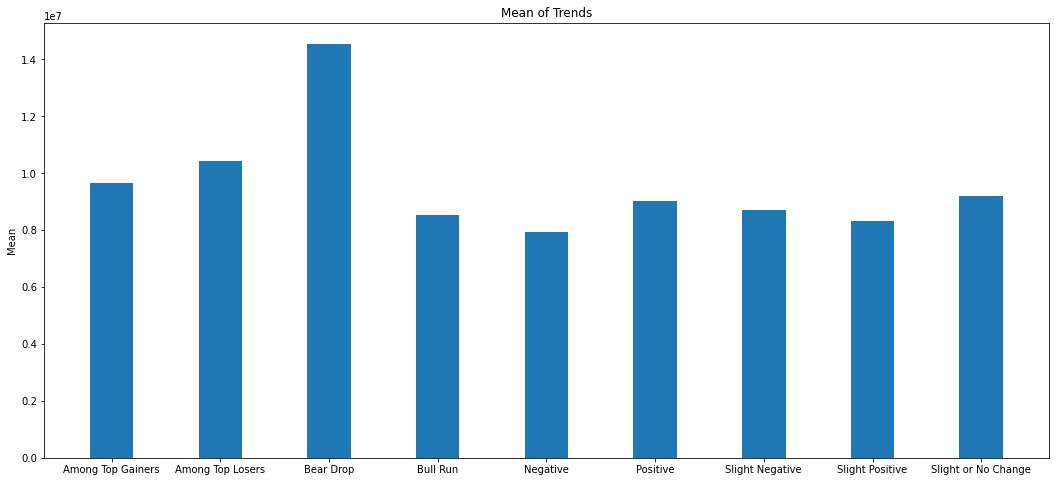

In [35]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(len(group2)),group2.groups)
plt.ylabel('Mean')
plt.title('Mean of Trends')
plt.bar(np.arange(len(group2)),group2['Volume'].mean(), width=0.4)

<BarContainer object of 9 artists>

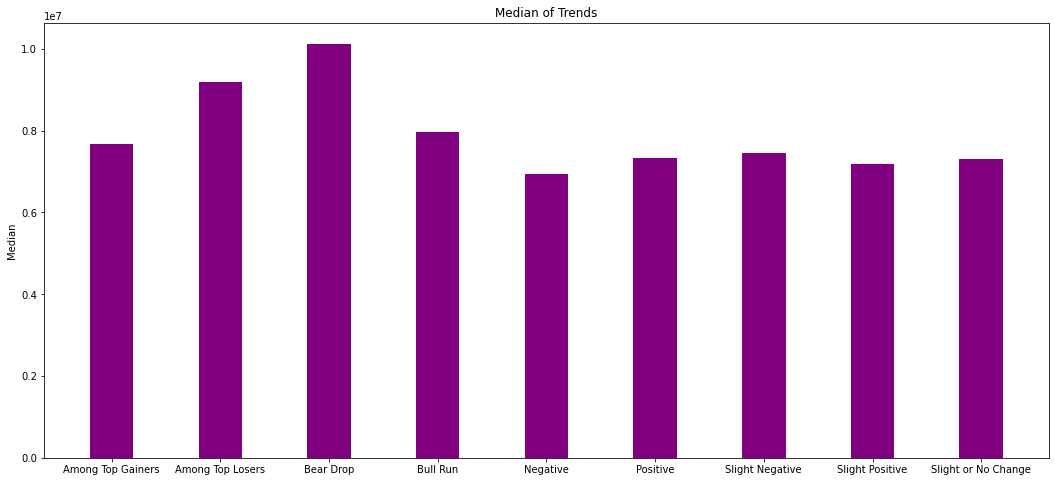

In [36]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(len(group2)),group2.groups)
plt.ylabel('Median')
plt.title('Median of Trends')
plt.bar(np.arange(len(group2)),group2['Volume'].median(), width=0.4,color='purple')

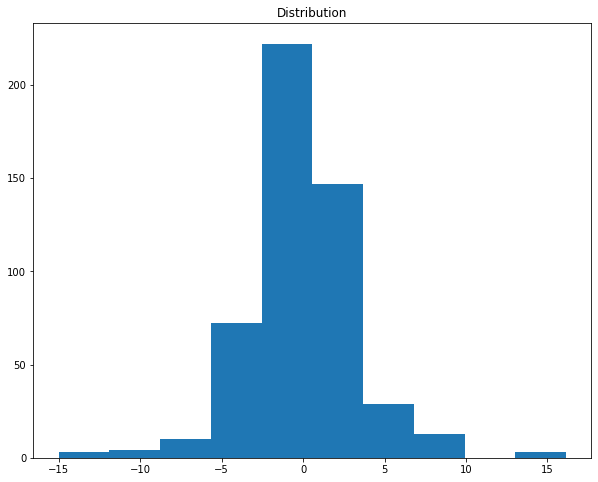

In [37]:
plt.figure(figsize=(10,8))
plt.hist(df['Percent Change'])
plt.title('Distribution')
plt.show()